In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

x = np.linspace(0.0,10.0, num=100)
a = 4.0
b = -3.5
c = 0.0
y = (a*(x**2)) + (b*x) + c

#   let's add noise to the data
#   np.random.normal(mean, standardDeviation, num)
noise = np.random.normal(0, 10., 100)
y = y+noise

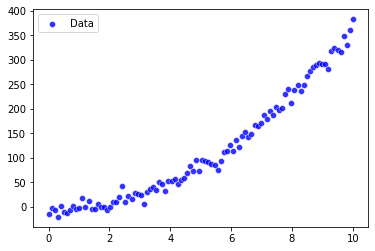

In [2]:
#   Here we can see the placement of the data present in our synthetic datatset

sns.scatterplot(x=x,y=y,color="blue",alpha=0.8)
plt.legend(['Data'])
plt.show()

In [3]:
#   Define a function to calculate the log likelihood required for the Guassian aproach

def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

In [4]:
#   Define my function which will return the objective function to be minimized

def myFunction(var):
    #   load my  data
#     [x, y] = np.load('myData.npy')
    [x_, y_] = [x,y]
    yGuess = (var[2]*(x_**2)) + (var[1]*x_) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (-1*f)

In [5]:
%%capture
#   The line above required to omit unnecessary outputs
#   Let's pick some random starting points for the initial 'guesstimate' of the function required for optimization    

nvar = 3
var = np.zeros(nvar)
var[0] = -15.5
var[1] = 19.5
var[2] = -1.0

#   let's maximize the likelihood (minimize -1*max(likelihood)

from scipy.optimize import minimize
res = minimize(myFunction, var, method='BFGS',
                options={'disp': True})

In [6]:
#   perform least squares fit using scikitlearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(x[:, np.newaxis], y)
coefs = model.named_steps['linear'].coef_
y_pred = model.predict(x[:, np.newaxis])

In [7]:
#   let's see the metrics for train data

print("Train")
print("r-score:", model.score(x[:, np.newaxis],y))

Train
r-score: 0.9921058052811016


In [8]:
#   And the same thing for test data

print("Test")
print("r-score:", model.score(x[:, np.newaxis],y_pred))
print("MSE:",np.mean((y_pred - y) ** 2))

Test
r-score: 1.0
MSE: 99.3940404388028


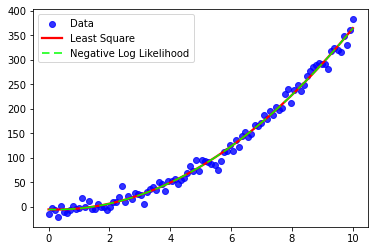

In [9]:
#   Let's see how our predicted values from the model above correspond to the predictions made by simple regression

sns.regplot(x=x[:, np.newaxis],y=y,color="blue",line_kws=dict(color="red"),order=2,ci=None)
plt.plot(x,y_pred,color="lime",linestyle=(5,(10,3)))
plt.legend(['Data','Least Square','Negative Log Likelihood'])
plt.show()